In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('results/exps.csv')
df.head()

,model_name,dataset_name,feature_type_name,hones16,emoti16,extra16,agree16,consc16,openn16,icar_hat0,icar_hat1,icar_hat2
0,MLP,Regular,Text,0.1342,0.1441,0.1409,0.1343,0.1512,0.1407,0.0349,0.0422,0.0473
1,MLP,Augmented,Text,0.1349,0.1459,0.1412,0.1360,0.1516,0.1411,0.0429,0.0463,0.0522
2,MLP,Regular,All,0.1601,0.1471,0.1565,0.1446,0.1588,0.1606,0.0787,0.1001,0.0794
3,MLP,Augmented,All,0.1386,0.1421,0.1425,0.1418,0.1497,0.1414,0.0383,0.0424,0.0483
4,SVR,Regular,Text,0.1334,0.1355,0.1412,0.1438,0.1423,0.1339,0.0314,0.0382,0.0462


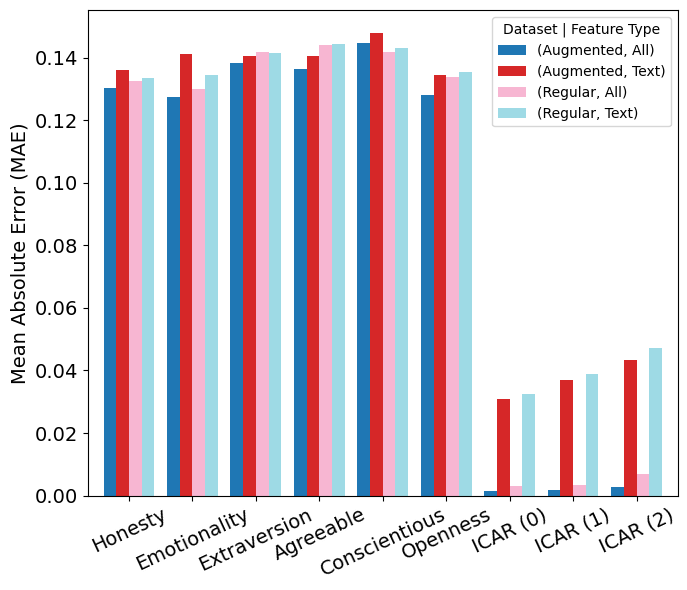

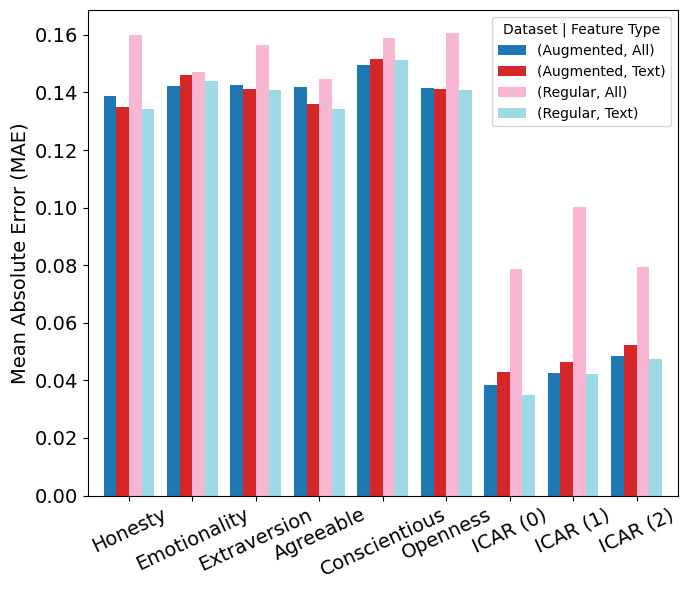

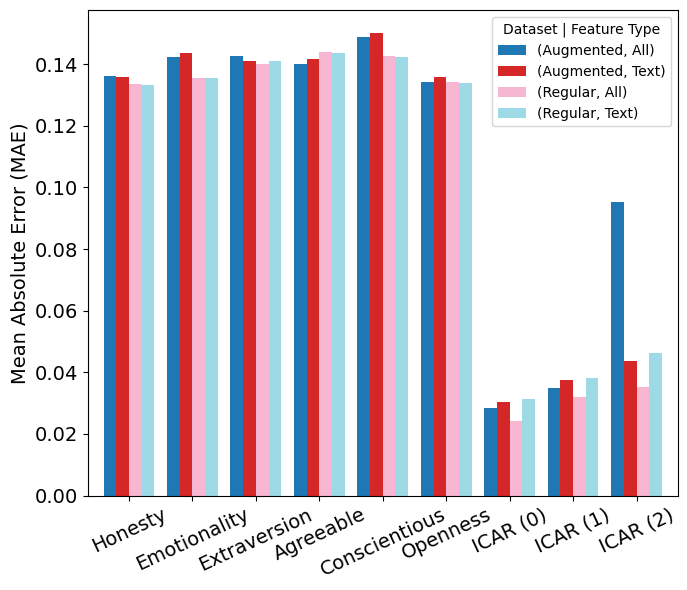

In [3]:
custom_order = [
    "hones16",
    "emoti16",
    "extra16",
    "agree16",
    "consc16",
    "openn16",
    "icar_hat0",
    "icar_hat1",
    "icar_hat2",
]

label_names= {
    "hones16": "Honesty",
    "emoti16": "Emotionality",
    "extra16": "Extraversion",
    "agree16": "Agreeable",
    "consc16": "Conscientious",
    "openn16": "Openness",
    "icar_hat0": "ICAR (0)",
    "icar_hat1": "ICAR (1)",
    "icar_hat2": "ICAR (2)",
}

melted_df = df.melt(
    id_vars=["model_name", "dataset_name", "feature_type_name"],
    var_name="target_variable",
    value_name="MAE",
)
melted_df["target_variable"] = pd.Categorical(
    melted_df["target_variable"], categories=custom_order, ordered=True
)
melted_df["target_variable"] = melted_df["target_variable"].map(label_names)

for model, group in melted_df.groupby("model_name"):
    pivot_df = group.pivot_table(
        index="target_variable",
        columns=["dataset_name", "feature_type_name"],
        values="MAE",
        aggfunc="mean",
        observed=False,
    )

    pivot_df.plot(kind="bar", figsize=(7, 6), width=0.8, colormap="tab20")
    plt.xlabel("")
    plt.ylabel("Mean Absolute Error (MAE)", fontsize=14)
    plt.xticks(rotation=25, fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(
        title="Dataset | Feature Type",
        loc="upper right",
    )
    plt.tight_layout()
    plt.savefig(f"artifacts/{model.lower()}.pdf", format="pdf")
    plt.show()